In [106]:
from tqdm.notebook import tqdm
from glob import glob
import os
import random
import av
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
from insightface.utils import face_align 


def video2numpy(path):
    container = av.open(path)
    frames = {}
    for idx, frame in enumerate(container.decode(video=0)):
        numpy_RGB = np.array(frame.to_image())
        frames[idx] = numpy_RGB
    container.close()

    return frames


all_faces_paths = glob(f'../MELD/faces/val/*')
random.shuffle(all_faces_paths)
print(f"there are {len(all_faces_paths)} pickles")
all_faces_paths = all_faces_paths[:100]
print(f"now there are {len(all_faces_paths)} pickles")

embs = []
for facepath in tqdm(all_faces_paths):
    videopath_a = facepath.replace('faces', 'raw-videos').replace('.pkl', '.mp4')
    videopath_b = facepath.replace('faces', 'raw-videos').replace('.pkl', '.avi')

    if os.path.isfile(videopath_a):
        videopath = videopath_a
    elif os.path.isfile(videopath_b):
        videopath = videopath_b
    else:
        raise FileNotFoundError(f"{facepath} does not have the corresponding video.")

    detections = pickle.load(open(facepath ,'rb'))
    frames = video2numpy(videopath)

    indexes = list(frames.keys())
    for idx in indexes:
        img = frames[idx]
        dtt = detections[idx]

        for det in dtt:
            img_aligned = face_align.norm_crop(img, landmark=det.landmark)
            embs.append((det.normed_embedding, img_aligned))


there are 1112 pickles
now there are 100 pickles


0.91930157


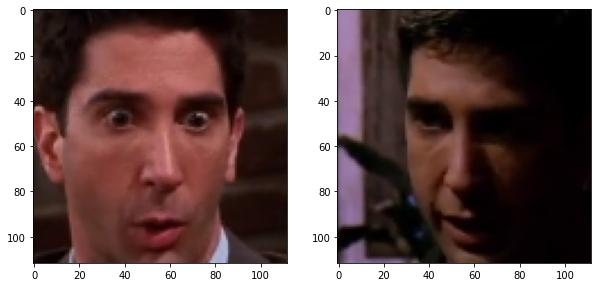

In [115]:
THRESH = 1

while True:
    idx1 = np.random.randint(0, len(embs))
    idx2 = np.random.randint(0, len(embs))

    dist = np.arccos(np.dot(embs[idx1][0], embs[idx2][0]))

    if dist < THRESH:
        break
print(dist)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(embs[idx1][1])

plt.subplot(1,2,2)
plt.imshow(embs[idx2][1])